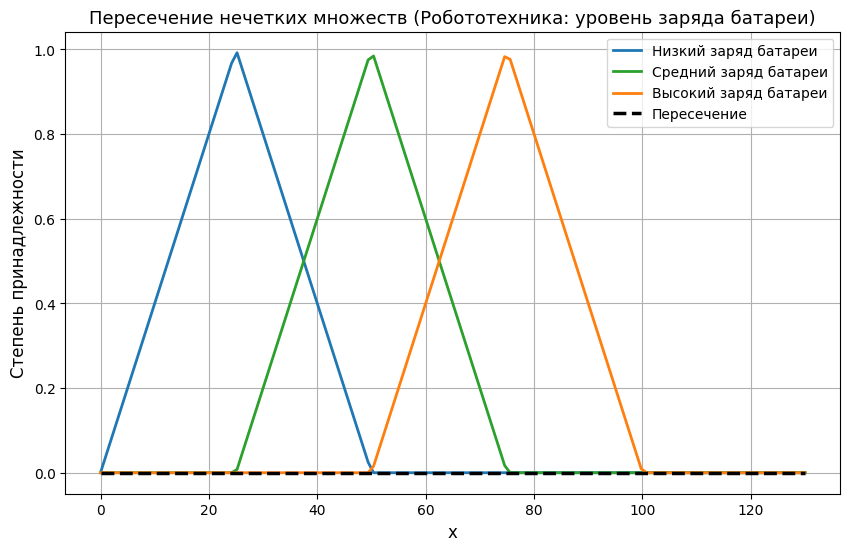

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TriangularFuzzySet:
    def __init__(self, name, a, b, c, color):
        self.name = name      
        self.a = a            
        self.b = b            
        self.c = c            
        self.color = color    

    def membership_degree(self, x):
        """Вычисление степени принадлежности для треугольной функции."""
        if x < self.a or x > self.c:
            return 0
        elif self.a <= x < self.b:
            return (x - self.a) / (self.b - self.a)
        elif self.b <= x < self.c:
            return (self.c - x) / (self.c - self.b)
        else:
            return 1

    def plot(self, x_values):
        """Построение графика треугольной функции."""
        y_values = [self.membership_degree(x) for x in x_values]
        plt.plot(x_values, y_values, label=self.name, color=self.color, linewidth=2)

def fuzzy_intersection(sets, x_values):
    """Пересечение нечетких множеств (операция min)."""
    intersection_values = []
    for x in x_values:
        min_degree = min(f_set.membership_degree(x) for f_set in sets)
        intersection_values.append(min_degree)
    return intersection_values

def plot_fuzzy_intersection(sets, x_values):
    """Построение графика для пересечения нечетких множеств."""
    plt.figure(figsize=(10, 6))
    
    for fuzzy_set in sets:
        fuzzy_set.plot(x_values)
    
    intersection_values = fuzzy_intersection(sets, x_values)
    plt.plot(x_values, intersection_values, '--', color='black', linewidth=2.5, label='Пересечение')

    plt.title('Пересечение нечетких множеств (Робототехника: уровень заряда батареи)', fontsize=13)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Степень принадлежности', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

low_battery = TriangularFuzzySet('Низкий заряд батареи', 0, 25, 50, '#1f77b4')      
medium_battery = TriangularFuzzySet('Средний заряд батареи', 25, 50, 75, '#2ca02c') 
high_battery = TriangularFuzzySet('Высокий заряд батареи', 50, 75, 100, '#ff7f0e')  

x_values = np.linspace(0, 130, 130)

plot_fuzzy_intersection([low_battery, medium_battery, high_battery], x_values)
